In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

df = pd.read_csv(r'C:\Users\Andrew\Documents\datasets\superstore.csv', encoding= 'unicode_escape')

In [5]:
#data preview
df.head()

#pd.set_option('display.max_rows', none)


In [6]:
#check data for missing info
for col in df.columns:
    nulls = np.mean(df[col].isnull())
    print('{}-{}%'.format(col,nulls))

Row ID-0.0%
Order ID-0.0%
Order Date-0.0%
Ship Date-0.0%
Ship Mode-0.0%
Customer ID-0.0%
Customer Name-0.0%
Segment-0.0%
Country-0.0%
City-0.0%
State-0.0%
Postal Code-0.0%
Region-0.0%
Product ID-0.0%
Category-0.0%
Sub-Category-0.0%
Product Name-0.0%
Sales-0.0%
Quantity-0.0%
Discount-0.0%
Profit-0.0%


In [7]:
#only views one customer id removing any duplicates/out of format entries
df['Customer ID'].drop_duplicates().sort_values(ascending=False)

18      ZD-21925
588     ZC-21910
1393    YS-21880
753     YC-21895
481     XP-21865
          ...   
4961    AB-10015
4020    AA-10645
12      AA-10480
535     AA-10375
1159    AA-10315
Name: Customer ID, Length: 793, dtype: object

In [78]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [8]:
#extracts only the year an order was made
df['Order Year']=df['Order ID'].astype(str).str[3:7]

In [9]:
#if wanted to view profit rounded
df['Profit Int']= df['Profit'].astype('int64')

In [11]:
#shows data based on highest profit first
df_sv = df.sort_values(by=['Profit'], inplace=False, ascending=False)
df_sv.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Profit Int
6826,6827,CA-2016-118689,10/2/2016,10/9/2016,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.95,5,0.0,8399.9760,2016,8399
8153,8154,CA-2017-140151,3/23/2017,3/25/2017,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.96,4,0.0,6719.9808,2017,6719
4190,4191,CA-2017-166709,11/17/2017,11/22/2017,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.97,3,0.0,5039.9856,2017,5039
9039,9040,CA-2016-117121,12/17/2016,12/21/2016,Standard Class,AB-10105,Adrian Barton,Consumer,United States,Detroit,...,OFF-BI-10000545,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.74,13,0.0,4946.3700,2016,4946
4098,4099,CA-2014-116904,9/23/2014,9/28/2014,Standard Class,SC-20095,Sanjit Chand,Consumer,United States,Minneapolis,...,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,9449.95,5,0.0,4630.4755,2014,4630


In [91]:
df['profit_margin']=df['Profit']/df['Sales']

In [92]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Profit Int,profit_margin
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,41,0.1600
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,219,0.3000
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,0.4700
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,-383,-0.4000
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,2,0.1125


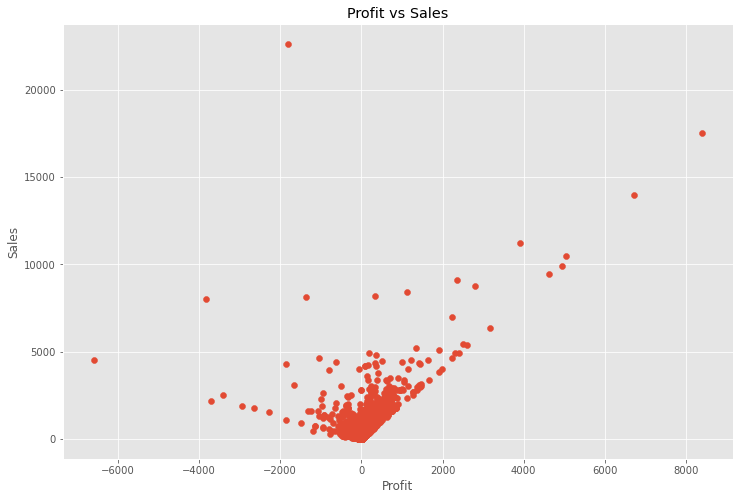

In [108]:
plt.scatter(x=df['Profit'],y=df['Sales'])
plt.title('Profit vs Sales')
plt.xlabel('Profit')
plt.ylabel('Sales')
plt.show()

<AxesSubplot:xlabel='Profit', ylabel='Sales'>

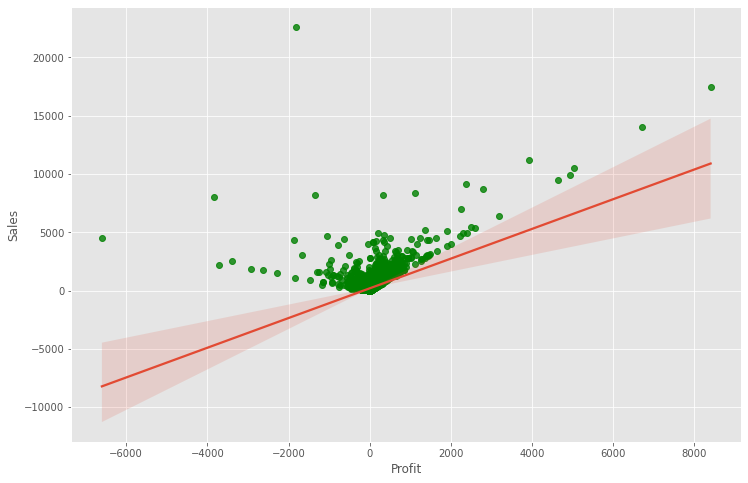

In [110]:
sns.regplot(x='Profit',y='Sales',data=df,scatter_kws={"color": "green"})

In [111]:
#correlation may be unnessary for this dataset but will run the code to show understanding
df.corr()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Profit Int,profit_margin
Row ID,1.000000,0.009671,-0.001359,-0.004016,0.013480,0.012497,0.012526,-0.020355
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961,-0.029960,-0.064404
Sales,-0.001359,-0.023854,1.000000,0.200795,-0.028190,0.479064,0.479259,0.003444
Quantity,-0.004016,0.012761,0.200795,1.000000,0.008623,0.066253,0.066275,-0.005280
Discount,0.013480,0.058443,-0.028190,0.008623,1.000000,-0.219487,-0.218287,-0.864452
Profit,0.012497,-0.029961,0.479064,0.066253,-0.219487,1.000000,0.999998,0.223732
Profit Int,0.012526,-0.029960,0.479259,0.066275,-0.218287,0.999998,1.000000,0.222501
profit_margin,-0.020355,-0.064404,0.003444,-0.005280,-0.864452,0.223732,0.222501,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

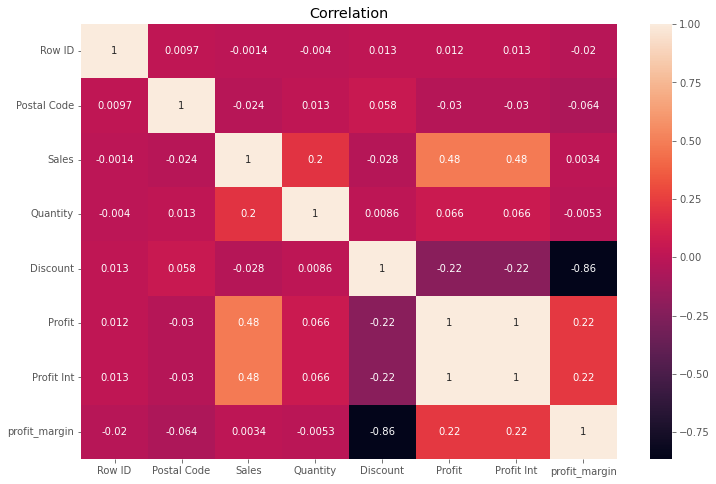

In [113]:
hmap = df.corr()
sns.heatmap(hmap, annot=True)
plt.title('Correlation')
plt.show

In [13]:
#giving every category a numerical representation to find correlation
df_num = df
for col_name in df_num:
    if(df_num[col_name].dtype=='object'):
        df_num[col_name] = df_num[col_name].astype('category')
        df_num[col_name] = df_num[col_name].cat.codes

In [14]:
df_num.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Profit Int
0,1,2500,304,219,2,143,166,0,0,194,...,12,0,4,386,261.9600,2,0.00,41.9136,2,41
1,2,2500,304,219,2,143,166,0,0,194,...,55,0,5,839,731.9400,3,0.00,219.5820,2,219
2,3,2296,835,906,2,237,201,1,0,266,...,946,1,10,1433,14.6200,2,0.00,6.8714,2,6
3,4,4372,93,128,3,705,687,0,0,153,...,319,0,16,366,957.5775,5,0.45,-383.0310,1,-383
4,5,4372,93,128,3,705,687,0,0,153,...,1316,1,14,573,22.3680,2,0.20,2.5164,1,2


<function matplotlib.pyplot.show(close=None, block=None)>

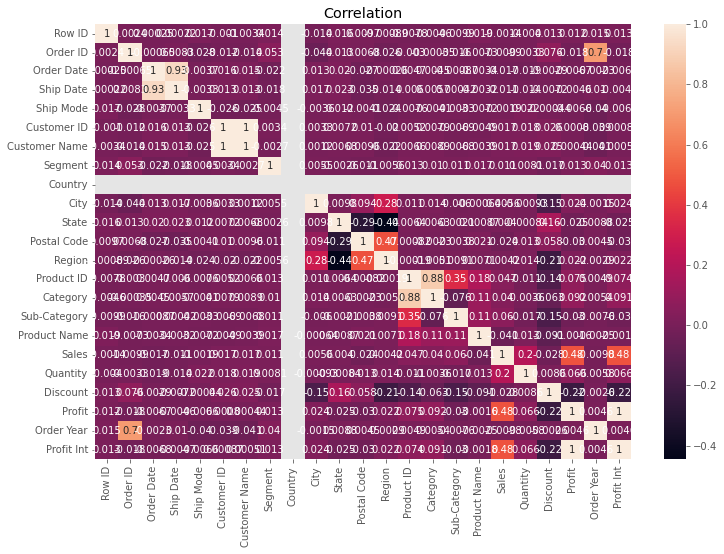

In [16]:
hmap = df_num.corr()
sns.heatmap(hmap, annot=True)
plt.title('Correlation')
plt.show

In [17]:
hmap.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Profit Int
Row ID,1.000000,0.002433,0.000253,0.000216,0.016959,-0.000997,-0.003430,0.014058,NaN,-0.013973,...,-0.007798,-0.004565,-0.009905,0.019020,-0.001359,-0.004016,0.013480,0.012497,0.015160,0.012526
Order ID,0.002433,1.000000,-0.000649,0.008277,-0.028389,-0.012171,-0.014211,0.053304,NaN,-0.044207,...,-0.003036,-0.000354,-0.015578,-0.007258,-0.009947,-0.003331,0.075533,-0.017873,0.703280,-0.017728
Order Date,0.000253,-0.000649,1.000000,0.929622,-0.003742,0.015693,0.015129,-0.021675,NaN,0.012957,...,0.004706,0.004530,-0.000865,-0.003385,-0.016608,-0.019467,-0.002860,-0.006737,-0.002259,-0.006764
Ship Date,0.000216,0.008277,0.929622,1.000000,-0.003305,0.013002,0.012903,-0.018046,NaN,0.016707,...,0.005992,0.005690,0.000420,-0.003180,-0.011320,-0.014260,-0.007218,-0.004642,0.010132,-0.004676
Ship Mode,0.016959,-0.028389,-0.003742,-0.003305,1.000000,-0.025584,-0.024793,-0.004527,NaN,-0.003602,...,-0.007634,-0.004129,-0.003275,-0.007198,-0.001887,0.022440,-0.000436,-0.006619,-0.040368,-0.006589


In [18]:
stk = df_num.corr()
stk_2 = stk.unstack()
stk_sort = stk_2.sort_values()

In [19]:
#positive correlation
pos_corr = stk_sort[(stk_sort)>.7]
pos_corr

Order ID       Order Year       0.703280
Order Year     Order ID         0.703280
Product ID     Category         0.879867
Category       Product ID       0.879867
Order Date     Ship Date        0.929622
Ship Date      Order Date       0.929622
Customer ID    Customer Name    0.995754
Customer Name  Customer ID      0.995754
Profit         Profit Int       0.999998
Profit Int     Profit           0.999998
Row ID         Row ID           1.000000
Profit         Profit           1.000000
Order ID       Order ID         1.000000
Order Date     Order Date       1.000000
Ship Date      Ship Date        1.000000
Ship Mode      Ship Mode        1.000000
Customer ID    Customer ID      1.000000
Customer Name  Customer Name    1.000000
Segment        Segment          1.000000
City           City             1.000000
Order Year     Order Year       1.000000
State          State            1.000000
Region         Region           1.000000
Product ID     Product ID       1.000000
Category       C